<a href="https://colab.research.google.com/github/vy-phung/genomic-data-science-project-about-fetus-and-adult/blob/main/Predicted_and_classified_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction and Classification from fetal and adult genes** 
**<h3>Author</h3>** 
<p>Vy K Phung</p>

**<h3>Date</h3>** 
<p>2021-Oct-15</p>

## **Introduction**

I will use 2 types of genomic datasets to identify if we can predict ages and classify age_group (fetus or adult) and genders of these 10 samples: 
1. Data for regulated gene.csv (5566 genes, already statistically analyzed and transformed in R)
2. The most up-down regulated genes (2 genes, extracting from data for regulated gene.csv)

**Getting data in Github:** genomic data (tidy_data folder); phenotype data (sample_data folder)

####**Steps:**
*   Classifying age_group (fetus or adult) of samples and gender (female or male) by using SVM (Support Vector Machines)
*   Predicting age which is continuous data by using Multi linear regression, and Non-linear regression


**<h2>Table of content</h2>**
<ul>
    <li>Part 1: Algorithm</li>
    <li>Part 2: Analyzing table type 1</li>
    <li>Part 3: Analyzing table type 2</li>

<ul>

**<h2>Part 1: Algorithm</h2>**

In [ ]:
# Import packages 
# Package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
# visualization package
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#SVM & Multi linear regression
class Prediction:
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def train_test(self):
      # lr is regressor used to predict or classify 
    x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.20, random_state=0)
    self.x_test = x_test
    self.x_train = x_train
    self.y_test = y_test
    self.y_train = y_train
    print("number of test samples :", self.x_test.shape, self.y_test.shape)
    print("number of training samples:",self.x_train.shape, self.y_train.shape)
  def linear(self,x,y): 
    lr = LinearRegression()
    self.train_test() 
    lr.fit(self.x_train,self.y_train)
    print("test actual data: ",self.y_test.values)
    print("test predicted data: ",lr.predict(self.x_test)) 
    print('The R-square of testing data: ', lr.score(self.x_test, self.y_test))
    print('The R-square of training data: ', lr.score(self.x_train, self.y_train))
    print('The mean square error of actual and predicted fitting data is: ', mean_squared_error(self.y, lr.predict(self.x)))
  def svm(self,x,y):
    self.train_test()
    clf = svm.SVC(kernel='rbf')
    clf.fit(self.x_train, self.y_train) 
    yhat = clf.predict(self.x_test)
    print('test actual value:',yhat)
    print('test predicted value:', self.y_test)
      # age classification
    cnf_matrix = confusion_matrix(self.y_test, yhat, labels=[1,0])
    print(cnf_matrix)
    print(classification_report(self.y_test, yhat))

In [ ]:
# Non-linear regression
def sigmoid(x,beta1,beta2):
  y = 1 / (1 + np.exp(-beta1*(x-beta2)))
  return y

**<h2>Part 2: Table type 1</h2>**

#### <b>Data processing<b/>

In [ ]:
up_down = pd.read_csv("data for regulated gene.csv")
up_down

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
0,A2M,13185.383185,-1.670680,0.420489,-3.973179,7.091974e-05,1.717291e-04,13.657416,13.795969,12.584194,13.003245,12.597035,15.235020,12.938130,13.881265,12.930901,12.535831
1,A2ML1,484.632776,-2.748295,0.569283,-4.827644,1.381576e-06,4.322248e-06,8.848175,9.062477,6.909735,8.644313,7.457088,10.622862,6.885452,7.708383,7.500564,7.351208
2,A4GALT,412.311453,-2.790862,0.571964,-4.879432,1.063917e-06,3.379052e-06,8.868851,8.344972,6.895125,8.568670,6.710507,10.362960,7.260562,7.533763,7.292369,6.723675
3,AARD,124.885643,-2.105662,0.537200,-3.919699,8.865947e-05,2.115377e-04,7.347104,7.314591,5.402734,6.636227,6.395016,7.306073,6.484457,7.470666,5.264764,5.737391
4,AARS1,33645.649283,-1.564934,0.270913,-5.776517,7.626273e-09,3.150984e-08,15.757594,15.345289,14.133470,15.908997,14.037013,14.566318,14.312565,15.532491,14.157486,14.182287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,ZWILCH,2469.451801,2.212490,0.366351,6.039259,1.548240e-09,6.965252e-09,9.203633,10.563658,11.688186,9.646344,11.741266,9.119705,12.014128,10.472781,11.676821,11.858405
5562,ZWINT,1431.031577,2.470592,0.456833,5.408086,6.370174e-08,2.350018e-07,9.158430,9.266755,11.768482,8.770140,10.929261,8.653688,9.032225,8.943709,11.047248,11.014847
5563,ZXDA,1338.880407,1.446283,0.201328,7.183722,6.783895e-13,4.459430e-12,9.298298,9.408328,10.695708,9.704292,10.691396,9.581422,10.874795,9.996956,10.778896,10.978820
5564,ZXDC,14083.362352,1.596761,0.129687,12.312466,7.761457e-35,3.260866e-33,12.904692,12.734604,14.242381,12.935801,14.026589,12.953526,14.199765,12.951150,14.424315,14.336139


In [ ]:
select = ["Unnamed: 0","SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]
up_down1 = up_down[select]
up_down1 = up_down1.set_index("Unnamed: 0")
up_down1.index.names = [None]
up_down_T = up_down1.T
x = up_down_T
x

,A2M,A2ML1,A4GALT,AARD,AARS1,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA2,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCC12,ABCC4,ABCC8,ABCG2,ABCG4,ABHD11,ABHD12,ABHD12B,ABHD14A,ABHD14B,ABHD15,ABHD16B,ABHD17A,ABHD18,ABHD8,ABI3BP,ABL2,ABLIM2,ABR,ABRACL,ABRAXAS1,ABTB1,ACACB,ACADS,...,ZNF829,ZNF83,ZNF831,ZNF836,ZNF84,ZNF841,ZNF844,ZNF845,ZNF85,ZNF850,ZNF852,ZNF860,ZNF878,ZNF879,ZNF880,ZNF883,ZNF90,ZNF91,ZNF92,ZNF93,ZNRF1,ZNRF2,ZRANB2-AS1,ZSCAN12,ZSCAN16,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN23,ZSCAN26,ZSCAN30,ZSCAN9,ZSWIM4,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZXDC,ZZZ3
SRR1554534,13.657416,8.848175,8.868851,7.347104,15.757594,15.412314,15.773004,10.728758,8.459024,6.127944,16.924871,6.642122,11.876442,11.226060,10.146097,11.725727,9.959768,8.642513,13.262715,12.156003,12.361851,10.660498,14.027339,8.701414,11.986268,10.572723,9.056314,9.861490,12.058016,9.233208,14.098318,7.519580,12.477906,14.127248,16.562266,10.143301,8.544178,13.551022,12.606489,10.299273,...,9.361568,11.656330,8.638472,9.162450,6.948577,10.958141,8.671796,8.854454,7.266704,7.256993,7.701330,7.134040,5.523122,8.388920,9.117129,9.318429,5.447482,10.384837,9.385131,7.455699,13.007817,9.953358,5.873261,9.956498,8.342552,10.050968,8.445623,9.713292,7.658145,11.056144,11.187060,9.657207,11.358897,10.997099,12.237565,9.203633,9.158430,9.298298,12.904692,11.142157
SRR1554535,13.795969,9.062477,8.344972,7.314591,15.345289,15.065392,15.345071,11.097286,8.806715,6.304167,16.764446,7.367755,11.504536,12.397963,10.500113,11.504491,9.713523,9.107198,12.773792,12.353510,11.955876,10.431284,13.922281,8.933736,11.841070,10.369419,9.143898,9.390017,11.550377,9.317387,13.556946,8.419397,12.318609,13.426870,16.039723,10.826507,9.050662,13.276132,11.843885,10.275955,...,9.371152,12.292076,7.858841,9.165177,7.078620,11.066317,9.313838,9.245559,8.198783,7.855481,7.607156,6.885632,6.584933,9.262461,9.203113,9.805414,6.036277,11.065840,10.845381,7.943450,12.606994,10.172354,7.158877,10.243413,8.677554,9.795162,8.263585,9.464862,7.331028,11.578808,11.583213,9.615276,10.480033,10.825541,12.483370,10.563658,9.266755,9.408328,12.734604,11.893657
SRR1554568,12.584194,6.909735,6.895125,5.402734,14.133470,11.532492,14.755580,13.191035,6.858484,7.621509,14.372198,6.097790,11.133889,8.692355,9.506912,9.500953,5.277975,10.846871,10.464994,10.012782,10.405635,9.161784,11.737641,3.264354,10.270335,9.561828,7.882171,8.783332,9.927939,10.521080,11.857025,9.691310,13.387431,10.465655,15.238726,12.014159,9.977788,11.931049,10.941669,8.909448,...,10.969787,13.693378,3.172974,11.605037,8.457333,12.753678,11.249995,11.190910,10.281550,9.786821,10.370039,9.682878,7.839871,10.127181,11.089222,11.054856,8.839597,13.197695,12.082913,10.808293,14.001511,11.231796,8.347241,12.090830,10.170591,12.288275,9.769823,10.585639,10.375166,12.529951,12.612542,11.566507,12.185891,13.014882,13.548023,11.688186,11.768482,10.695708,14.242381,12.719315
SRR1554561,13.003245,8.644313,8.568670,6.636227,15.908997,15.465764,15.899338,10.717510,8.575097,5.908803,16.784595,6.879113,12.057728,11.010436,10.494653,11.084899,10.092062,8.077065,13.661388,11.516742,12.396533,10.475263,13.848728,8.642972,11.968709,10.327511,8.692463,9.800060,12.277649,9.003095,14.280003,7.843736,12.702621,14.271265,16.907170,10.242545,8.426179,13.755013,12.134428,10.050875,...,9.346246,11.437299,9.405653,9.549900,6.928008,10.941166,8.483845,8.509000,6.692054,7.470648,8.373986,7.427324,5.708142,8.073806,9.156198,9.659393,5.726660,10.788137,9.020034,7.214739,12.989843,10.252754,6.447057,9.869246,7.923305,9.945018,9.097662,9.199770,8.230564,11.173858,11.040663,9.007093,11.489777,10.879565,12.278762,9.646344,8.770140,9.704292,12.935801,11.499921
SRR1554567,12.597035,7.457088,6.710507,6.395016,14.037013,11.828298,14.695775,12.993483,7.561909,7.299447,14.174753,6.097308,9.223357,10.005713,9.447863,9.724329,7.269236,10.216889,11.079017,10.814944,10.334022,9.238554,12.053859,4.516572,10.446782,9.577568,7.492575,8.560335,9.900396,10.267065,11.787334,10.041557,13.502438,10.731063,15.325546,11.55971

In [ ]:
pheno = pd.read_csv("/content/pheno_sample.csv")
pheno = pheno.set_index("Unnamed: 0")
pheno.index.names = [None]
pheno

,fetus_adult,age_group,age,sex,gender
SRR1554534,adult,1,40.4200,male,1
SRR1554535,adult,1,41.5800,male,1
SRR1554568,fetus,0,-0.4986,male,1
SRR1554561,adult,1,43.8800,male,1
SRR1554567,fetus,0,-0.4027,male,1
SRR1554536,adult,1,44.1700,female,0
SRR1554541,fetus,0,-0.3836,male,1
SRR1554539,adult,1,36.5000,female,0
SRR1554538,fetus,0,-0.4027,female,0
SRR1554537,fetus,0,-0.3836,female,0


In [ ]:
x_all = pd.concat([x,pheno], axis=1)
x_all

,A2M,A2ML1,A4GALT,AARD,AARS1,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA2,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCC12,ABCC4,ABCC8,ABCG2,ABCG4,ABHD11,ABHD12,ABHD12B,ABHD14A,ABHD14B,ABHD15,ABHD16B,ABHD17A,ABHD18,ABHD8,ABI3BP,ABL2,ABLIM2,ABR,ABRACL,ABRAXAS1,ABTB1,ACACB,ACADS,...,ZNF841,ZNF844,ZNF845,ZNF85,ZNF850,ZNF852,ZNF860,ZNF878,ZNF879,ZNF880,ZNF883,ZNF90,ZNF91,ZNF92,ZNF93,ZNRF1,ZNRF2,ZRANB2-AS1,ZSCAN12,ZSCAN16,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN23,ZSCAN26,ZSCAN30,ZSCAN9,ZSWIM4,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZXDC,ZZZ3,fetus_adult,age_group,age,sex,gender
SRR1554534,13.657416,8.848175,8.868851,7.347104,15.757594,15.412314,15.773004,10.728758,8.459024,6.127944,16.924871,6.642122,11.876442,11.226060,10.146097,11.725727,9.959768,8.642513,13.262715,12.156003,12.361851,10.660498,14.027339,8.701414,11.986268,10.572723,9.056314,9.861490,12.058016,9.233208,14.098318,7.519580,12.477906,14.127248,16.562266,10.143301,8.544178,13.551022,12.606489,10.299273,...,10.958141,8.671796,8.854454,7.266704,7.256993,7.701330,7.134040,5.523122,8.388920,9.117129,9.318429,5.447482,10.384837,9.385131,7.455699,13.007817,9.953358,5.873261,9.956498,8.342552,10.050968,8.445623,9.713292,7.658145,11.056144,11.187060,9.657207,11.358897,10.997099,12.237565,9.203633,9.158430,9.298298,12.904692,11.142157,adult,1,40.4200,male,1
SRR1554535,13.795969,9.062477,8.344972,7.314591,15.345289,15.065392,15.345071,11.097286,8.806715,6.304167,16.764446,7.367755,11.504536,12.397963,10.500113,11.504491,9.713523,9.107198,12.773792,12.353510,11.955876,10.431284,13.922281,8.933736,11.841070,10.369419,9.143898,9.390017,11.550377,9.317387,13.556946,8.419397,12.318609,13.426870,16.039723,10.826507,9.050662,13.276132,11.843885,10.275955,...,11.066317,9.313838,9.245559,8.198783,7.855481,7.607156,6.885632,6.584933,9.262461,9.203113,9.805414,6.036277,11.065840,10.845381,7.943450,12.606994,10.172354,7.158877,10.243413,8.677554,9.795162,8.263585,9.464862,7.331028,11.578808,11.583213,9.615276,10.480033,10.825541,12.483370,10.563658,9.266755,9.408328,12.734604,11.893657,adult,1,41.5800,male,1
SRR1554568,12.584194,6.909735,6.895125,5.402734,14.133470,11.532492,14.755580,13.191035,6.858484,7.621509,14.372198,6.097790,11.133889,8.692355,9.506912,9.500953,5.277975,10.846871,10.464994,10.012782,10.405635,9.161784,11.737641,3.264354,10.270335,9.561828,7.882171,8.783332,9.927939,10.521080,11.857025,9.691310,13.387431,10.465655,15.238726,12.014159,9.977788,11.931049,10.941669,8.909448,...,12.753678,11.249995,11.190910,10.281550,9.786821,10.370039,9.682878,7.839871,10.127181,11.089222,11.054856,8.839597,13.197695,12.082913,10.808293,14.001511,11.231796,8.347241,12.090830,10.170591,12.288275,9.769823,10.585639,10.375166,12.529951,12.612542,11.566507,12.185891,13.014882,13.548023,11.688186,11.768482,10.695708,14.242381,12.719315,fetus,0,-0.4986,male,1
SRR1554561,13.003245,8.644313,8.568670,6.636227,15.908997,15.465764,15.899338,10.717510,8.575097,5.908803,16.784595,6.879113,12.057728,11.010436,10.494653,11.084899,10.092062,8.077065,13.661388,11.516742,12.396533,10.475263,13.848728,8.642972,11.968709,10.327511,8.692463,9.800060,12.277649,9.003095,14.280003,7.843736,12.702621,14.271265,16.907170,10.242545,8.426179,13.755013,12.134428,10.050875,...,10.941166,8.483845,8.509000,6.692054,7.470648,8.373986,7.427324,5.708142,8.073806,9.156198,9.659393,5.726660,10.788137,9.020034,7.214739,12.989843,10.252754,6.447057,9.869246,7.923305,9.945018,9.097662,9.199770,8.230564,11.173858,11.040663,9.007093,11.489777,10.879565,12.278762,9.646344,8.770140,9.704292,12.935801,11.499921,adult,1,43.8800,male,1
SRR1554567,12.597035,7.457088,6.710507,6.395016,14.037013,11.828298,14.695775,12.993483,7.561909,7.299447,14.174753,6.097308,9.223357,10.005713,9.447863,9.724329,7.269236,10.216889,11.079017,10.814944,10.334022,9.238554,12.053859,4.516572,10.446782,9.577568,7.492575,8.560335,9.900396,10.267065,11.787334,10.041557,13.502438,10.731063,15.325546,11.559712,9.827031,11.203213,10.480759,9.069348,...,12.512834,10.905502,11.146212,10.226990,9.6998

In [ ]:
y = pheno[["age_group"]]
y

,age_group
SRR1554534,1
SRR1554535,1
SRR1554568,0
SRR1554561,1
SRR1554567,0
SRR1554536,1
SRR1554541,0
SRR1554539,1
SRR1554538,0
SRR1554537,0


In [ ]:
y_gender = pheno[["gender"]]
y_gender

,gender
SRR1554534,1
SRR1554535,1
SRR1554568,1
SRR1554561,1
SRR1554567,1
SRR1554536,0
SRR1554541,1
SRR1554539,0
SRR1554538,0
SRR1554537,0


In [ ]:
y_age = pheno[["age"]]
y_age

,age
SRR1554534,40.4200
SRR1554535,41.5800
SRR1554568,-0.4986
SRR1554561,43.8800
SRR1554567,-0.4027
SRR1554536,44.1700
SRR1554541,-0.3836
SRR1554539,36.5000
SRR1554538,-0.4027
SRR1554537,-0.3836


#### <b>SVM<b/>

**Classifying fetus or adult**

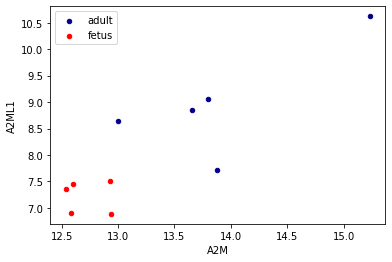

In [ ]:
#SVM
# 2 first genes (A2M, A2ML1)
ax = x_all[x_all['age_group'] == 1].plot(kind='scatter', x='A2M', y='A2ML1', color='DarkBlue', label='adult');
x_all[x_all['age_group'] == 0].plot(kind='scatter', x='A2M', y='A2ML1', color='Red', label='fetus', ax = ax);
plt.show()

In [ ]:
pr = Prediction(x,y)
pr.svm(x,y)

number of test samples : (2, 5566) (2, 1)
number of training samples: (8, 5566) (8, 1)
test actual value: [0 0]
test predicted value:             age_group
SRR1554568          0
SRR1554538          0
[[0 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Classifying gender of samples**

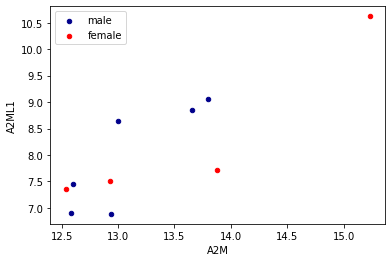

In [ ]:
# 2 first genes (A2M, A2ML1)
ax = x_all[x_all['gender'] == 1].plot(kind='scatter', x='A2M', y='A2ML1', color='DarkBlue', label='male');
x_all[x_all['gender'] == 0].plot(kind='scatter', x='A2M', y='A2ML1', color='Red', label='female', ax = ax);
plt.show()

In [ ]:
pr = Prediction(x,y_gender)
pr.svm(x,y_gender)

number of test samples : (2, 5566) (2, 1)
number of training samples: (8, 5566) (8, 1)
test actual value: [1 1]
test predicted value:             gender
SRR1554568       1
SRR1554538       0
[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and

#### <b>Predicting age (continuous data)<b/>

**Multi linear regression**

In [ ]:
p = Prediction(x,y_age)
p.linear(x,y_age)

number of test samples : (2, 5566) (2, 1)
number of training samples: (8, 5566) (8, 1)
test actual data:  [[-0.]
 [-0.]]
test predicted data:  [[-4.]
 [-2.]]
The R-square of testing data:  -2759.9297929965064
The R-square of training data:  1.0
The mean square error of actual and predicted fitting data is:  1.2695873364764059


The R-square of testing data:  -2759.9297929965064

The R-square of training data:  1.0

We can see that R^2 of testing data is negatively large, while that of training data is exactly fit which also means statistical model fits

It is overfitting

**Non linear regression**

According to the visualization below, we can see that there is no linear relationship between dependent variable(y_age) and independent variable(gene A2ML1), which might be the same to other genes. Therefore, I will try different model, which is Sigmoidal/Logistic model for a gene A2ML1 and see if there is any difference between this model and multi linear regresion

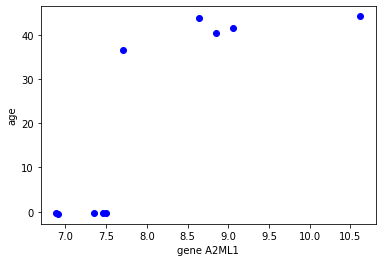

In [ ]:
plt.scatter(x['A2ML1'], y_age,  color='blue')
plt.xlabel("gene A2ML1")
plt.ylabel("age")
plt.show()

In [ ]:
x_data, y_data = (x['A2ML1'].values, y_age['age'].values)
# Lets normalize our data
x_A2ML1 = x_data/max(x_data)
y_a = y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_A2ML1, y_a)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 984.543745, beta_2 = 0.724056


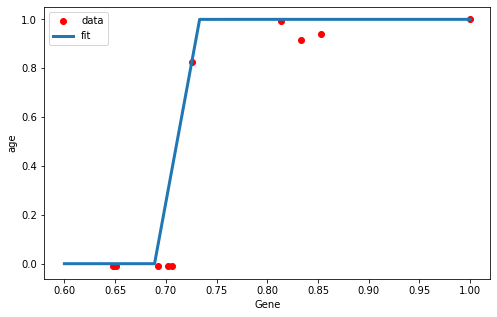

In [ ]:
plt.figure(figsize=(8,5))
# X is a new sample having different value ranging from 6 to 10 and be tested using model trained by gene A1BG 
X = np.linspace(6, 10, 10)
X = X/max(X)
y_new = sigmoid(X, *popt)
plt.plot(x_A2ML1, y_a, 'ro', label='data')
plt.plot(X,y_new, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('age')
plt.xlabel('Gene')
plt.show()

**<h2>Part 3: Table type 2</h2>**

#### <b>Data processing <b/>

In [ ]:
# The most up-regulated genes
up = up_down[up_down['log2FoldChange'] > 1]
up = up[up["padj"] == min(up["padj"])]
up = up.set_index("Unnamed: 0")
up.index.names = [None]
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
ST8SIA2,21470.98555,7.44298,0.2003,37.159148,3.119957e-302,4.823766e-298,8.614598,8.485263,14.645985,8.707785,14.756824,8.39641,15.159507,8.971893,14.917903,15.015816


In [ ]:
# The most down-regulated genes
down = up_down[up_down['log2FoldChange'] < -1]
down = down[down["padj"] == min(down["padj"])]
down = down.set_index("Unnamed: 0")
down.index.names = [None]
down

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
BCL2L2,21968.220153,-2.676407,0.088315,-30.305208,9.788276e-202,3.783413e-198,14.967316,14.943844,12.776112,15.151775,12.71442,14.999478,12.761278,15.053436,12.718466,12.793366


In [ ]:
up1 = up[["SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]]
up1_T = up1.T
up1_T

,ST8SIA2
SRR1554534,8.614598
SRR1554535,8.485263
SRR1554568,14.645985
SRR1554561,8.707785
SRR1554567,14.756824
SRR1554536,8.396410
SRR1554541,15.159507
SRR1554539,8.971893
SRR1554538,14.917903
SRR1554537,15.015816


In [ ]:
down1 = down[["SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]]
down1_T = down1.T
down1_T

,BCL2L2
SRR1554534,14.967316
SRR1554535,14.943844
SRR1554568,12.776112
SRR1554561,15.151775
SRR1554567,12.714420
SRR1554536,14.999478
SRR1554541,12.761278
SRR1554539,15.053436
SRR1554538,12.718466
SRR1554537,12.793366


In [ ]:
x2 = pd.concat([up1_T,down1_T],axis=1)
x2

,ST8SIA2,BCL2L2
SRR1554534,8.614598,14.967316
SRR1554535,8.485263,14.943844
SRR1554568,14.645985,12.776112
SRR1554561,8.707785,15.151775
SRR1554567,14.756824,12.714420
SRR1554536,8.396410,14.999478
SRR1554541,15.159507,12.761278
SRR1554539,8.971893,15.053436
SRR1554538,14.917903,12.718466
SRR1554537,15.015816,12.793366


#### <b>Predicting age (continuous data)<b/>

**Up-regulated genes**

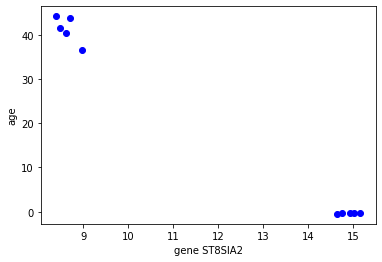

In [ ]:
# up-regulated gene
plt.scatter(x2['ST8SIA2'], y_age,  color='blue')
plt.xlabel("gene ST8SIA2")
plt.ylabel("age")
plt.show()

In [ ]:
# model for up-regulated genes
x_data, y_data = (x2['ST8SIA2'].values, y_age['age'].values)
# Lets normalize our data
x_ST8SIA2 = x_data/max(x_data)
y_a = y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_ST8SIA2, y_a)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = -63.863415, beta_2 = 0.617017


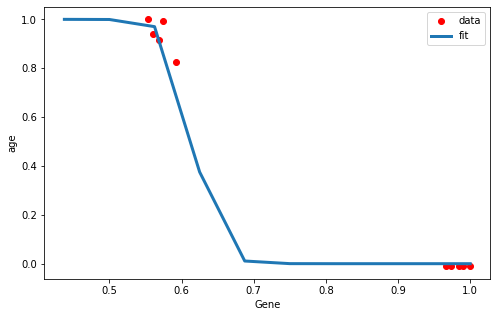

In [ ]:
# model for up-regulated genes
plt.figure(figsize=(8,5))
# X is a up-regulated gene
X = np.linspace(7, 16, 10)
X = X/max(X)
y_new = sigmoid(X, *popt)
plt.plot(x_ST8SIA2, y_a, 'ro', label='data')
plt.plot(X,y_new, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('age')
plt.xlabel('Gene')
plt.show()

**Down-regulated genes**

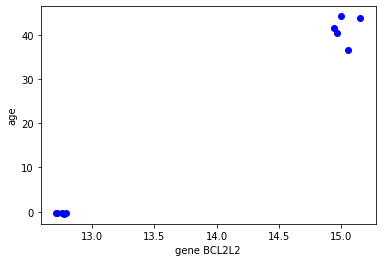

In [ ]:
# Down-regulated genes
plt.scatter(x2['BCL2L2'], y_age,  color='blue')
plt.xlabel("gene BCL2L2")
plt.ylabel("age")
plt.show()

In [ ]:
# model for down-regulated genes
x_data, y_data = (x2['BCL2L2'].values, y_age['age'].values)
# Lets normalize our data
x_BCL2L2 = x_data/max(x_data)
y_a = y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_BCL2L2, y_a)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 60.274175, beta_2 = 0.946089


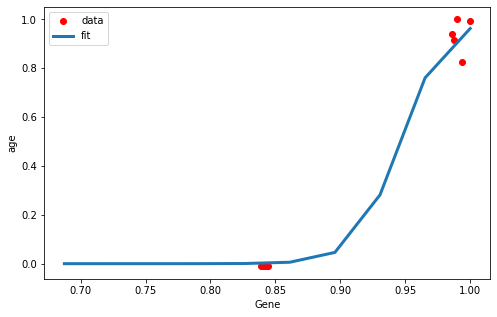

In [ ]:
# model for down-regulated genes
plt.figure(figsize=(8,5))
# X is a new down-regulated gene 
X = np.linspace(11, 16, 10)
X = X/max(X)
y_new = sigmoid(X, *popt)
plt.plot(x_BCL2L2, y_a, 'ro', label='data')
plt.plot(X,y_new, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('age')
plt.xlabel('Gene')
plt.show()